In [13]:
import tqdm
from preprocessing import *
import tigre.algorithms as algs
import tigre.utilities.gpu as gpu
import os

import numpy as np
import matplotlib.pyplot as plt

import data_making as dm
%reload_ext autoreload
%autoreload 2

In [14]:
root = r"F:\RawProjections\KRT20230315_samplingV3_hourglass"
expname = r"hourglassV3_25"
oroot = r"F:\ProcessedProjections"
numProj = 25
nrevs = 75
correction =None
geometry = fr"{os.path.join(root, 'hourglass_step0.nsiprg')}"
roi = [1024,700]
rot = 0

In [15]:
preprocess = DynamicProjectionsEQNR(
        root,
        expname,
        oroot,
        # args.oname,
        numProj,
        nrevs=nrevs,
        correction_parent=correction,
        geometry=geometry,
        roi=roi,
        rotation=rot,
    )

F:\RawProjections\KRT20230315_samplingV3_hourglass\hourglass_step0.nsiprg
Rotation: 270.0


In [16]:
cor = preprocess.find_centre_rotation()
print(cor)

100%|██████████| 201/201 [00:53<00:00,  3.77it/s]

Centre offset: 0.0
0.0


In [17]:
print(cor)

0.0


In [18]:
preprocess()

100%|██████████| 75/75 [54:24<00:00, 43.53s/it]


In [19]:
root_processed = r"F:\ProcessedProjections"
rec_oroot = r"F:\ReconstructionDatasets"
rec_oname = "hourglassV3_25_testing"
rec_class = dm.EquinorDynamicCT(root_processed, expname, rec_oroot, rec_oname)

In [27]:
print(rec_class)

# with open(os.path.join(rec_class.root, f"{rec_class.name}.pkl"), "rb") as g:
#             geo = pkl.load(g)

geo_class = IndustrialGeometryEQNR()
geo = geo_class()

geo.nDetector = np.array([1024, 700])
geo.sDetector = geo.nDetector * geo.dDetector
geo.nVoxel = np.array([1024, 700, 700])
geo.sVoxel = geo.nVoxel * geo.dVoxel
# 

with open(os.path.join(rec_class.root, f"{rec_class.name}.pkl"), "wb+") as g:
            # geo = pkl.load(g)
            pkl.dump(geo, g)

In [28]:
rec_0 = rec_class.reconstruct_idx(0)

In [29]:
print(rec_0.shape)

(1024, 700, 700)


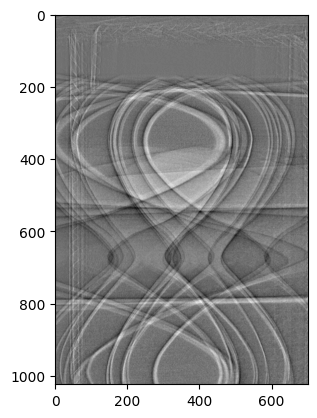

In [31]:
plt.imshow(rec_0[:,512,:], cmap="gray")
plt.show()
#Centre of rotation has to do with cropping of projections?